# K-FOLD VALIDATION


In [1]:
# k-fold cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
import pickle
import numpy as np


with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Train - TFIDF.pkl', 'rb') as f:
    df_train_80 = pickle.load(f)

with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Test - TFIDF.pkl', 'rb') as f:
    df_test_80 = pickle.load(f)

In [3]:
# join train and test data
df = pd.concat([df_train_80, df_test_80], ignore_index=True)

In [4]:
X_train = df['tfidf']
y_train = df['category_id']

In [5]:
from nn import NeuralNetwork
def kfold_cross_validation(X_train, y_train, model_hl_node, model_lr, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]

        # convert to numpy array and transpose the matrix to fit the model
        X_train_k_np_T = np.array([np.array(x) for x in X_train_k]).T
        X_test_k_np_T = np.array([np.array(x) for x in X_test_k]).T
        
        # init model
        myNN = NeuralNetwork(X_train_k_np_T.shape[0], model_hl_node, 3)
        history_cost_k, history_acc_k = myNN.train_until_cost_doesnt_change(X_train_k_np_T, y_train_k, model_lr)

        # predict
        _, Z1, A1, Z2, A2 = myNN.forward(X_test_k_np_T)
        predictions = np.argmax(A2, 0)
        accuracy_test_k = np.mean(predictions == y_test_k)

        scores.append(accuracy_test_k)
    return scores

In [7]:
k_scores_4 = kfold_cross_validation(X_train, y_train, 50, 0.1, 4)

Epoch 1 - train cost: 0.480962, train acc: 0.338435
Epoch 2 - train cost: 0.386228, train acc: 0.382653
Epoch 3 - train cost: 0.365882, train acc: 0.371599
Epoch 4 - train cost: 0.365257, train acc: 0.306973
Epoch 5 - train cost: 0.365013, train acc: 0.311224
Epoch 6 - train cost: 0.364770, train acc: 0.316327
Epoch 7 - train cost: 0.364530, train acc: 0.319728
Epoch 8 - train cost: 0.364292, train acc: 0.323129
Epoch 9 - train cost: 0.364055, train acc: 0.332483
Epoch 10 - train cost: 0.363819, train acc: 0.336735
Epoch 11 - train cost: 0.363583, train acc: 0.350340
Epoch 12 - train cost: 0.363346, train acc: 0.357993
Epoch 13 - train cost: 0.363111, train acc: 0.370748
Epoch 14 - train cost: 0.362877, train acc: 0.371599
Epoch 15 - train cost: 0.362643, train acc: 0.375850
Epoch 16 - train cost: 0.362409, train acc: 0.385204
Epoch 17 - train cost: 0.362177, train acc: 0.403061
Epoch 18 - train cost: 0.361945, train acc: 0.403912
Epoch 19 - train cost: 0.361712, train acc: 0.411565
Ep

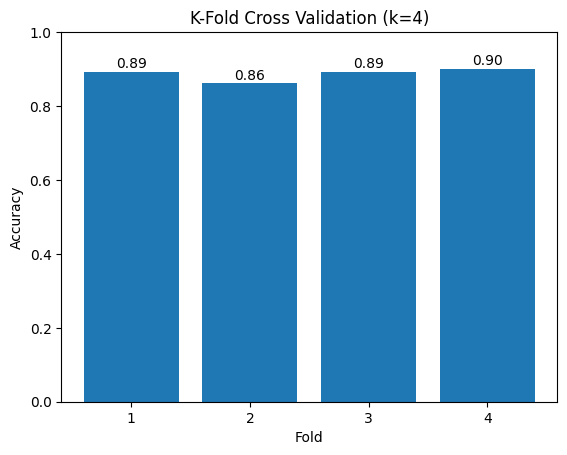

In [8]:
import matplotlib.pyplot as plt

# plot the k-fold cross validation with bar chart
plt.bar(range(1, 5), k_scores_4)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_4[0] + 0.01, f'{k_scores_4[0]:.2f}', ha='center')
plt.text(2, k_scores_4[1] + 0.01, f'{k_scores_4[1]:.2f}', ha='center')
plt.text(3, k_scores_4[2] + 0.01, f'{k_scores_4[2]:.2f}', ha='center')
plt.text(4, k_scores_4[3] + 0.01, f'{k_scores_4[3]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 5))
plt.title('K-Fold Cross Validation (k=4)')
plt.show()

In [9]:
score_mean = np.mean(k_scores_4)
score_std = np.std(k_scores_4)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')



Mean Accuracy: 0.8871855039725814
Standard Deviation: 0.014723138756316997
Accuracy: 0.8871855039725814 (+/- 0.014723138756316997)


In [10]:
k_scores_5 = kfold_cross_validation(X_train, y_train, 50, 0.1, 5)

Epoch 1 - train cost: 0.478901, train acc: 0.338645
Epoch 2 - train cost: 0.386129, train acc: 0.396813
Epoch 3 - train cost: 0.365890, train acc: 0.367331
Epoch 4 - train cost: 0.365230, train acc: 0.317131
Epoch 5 - train cost: 0.364984, train acc: 0.325896
Epoch 6 - train cost: 0.364740, train acc: 0.332271
Epoch 7 - train cost: 0.364500, train acc: 0.333068
Epoch 8 - train cost: 0.364261, train acc: 0.339442
Epoch 9 - train cost: 0.364023, train acc: 0.345020
Epoch 10 - train cost: 0.363786, train acc: 0.350598
Epoch 11 - train cost: 0.363548, train acc: 0.360159
Epoch 12 - train cost: 0.363311, train acc: 0.364940
Epoch 13 - train cost: 0.363076, train acc: 0.380876
Epoch 14 - train cost: 0.362841, train acc: 0.393625
Epoch 15 - train cost: 0.362607, train acc: 0.394422
Epoch 16 - train cost: 0.362374, train acc: 0.404781
Epoch 17 - train cost: 0.362142, train acc: 0.412749
Epoch 18 - train cost: 0.361909, train acc: 0.421514
Epoch 19 - train cost: 0.361677, train acc: 0.423108
Ep

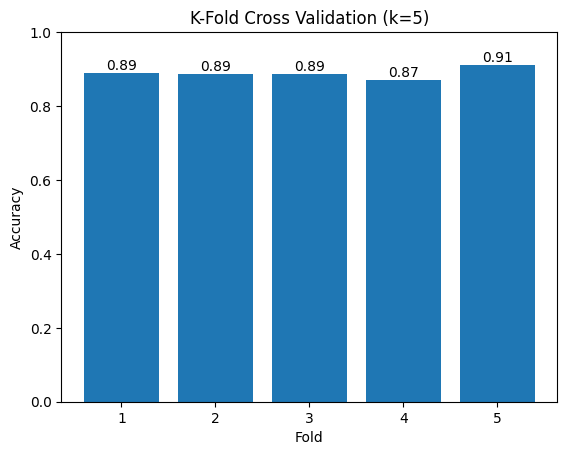

In [11]:
plt.bar(range(1, 6), k_scores_5)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_5[0] + 0.01, f'{k_scores_5[0]:.2f}', ha='center')
plt.text(2, k_scores_5[1] + 0.01, f'{k_scores_5[1]:.2f}', ha='center')
plt.text(3, k_scores_5[2] + 0.01, f'{k_scores_5[2]:.2f}', ha='center')
plt.text(4, k_scores_5[3] + 0.01, f'{k_scores_5[3]:.2f}', ha='center')
plt.text(5, k_scores_5[4] + 0.01, f'{k_scores_5[4]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 6))
plt.title('K-Fold Cross Validation (k=5)')
plt.show()

In [12]:
score_mean = np.mean(k_scores_5)
score_std = np.std(k_scores_5)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')


Mean Accuracy: 0.8878411102745162
Standard Deviation: 0.013170876698404256
Accuracy: 0.8878411102745162 (+/- 0.013170876698404256)


In [13]:
k_scores_10 = kfold_cross_validation(X_train, y_train, 50, 0.1, 10)

Epoch 1 - train cost: 0.477245, train acc: 0.335694
Epoch 2 - train cost: 0.386179, train acc: 0.382436
Epoch 3 - train cost: 0.366081, train acc: 0.380312
Epoch 4 - train cost: 0.365402, train acc: 0.311615
Epoch 5 - train cost: 0.365167, train acc: 0.315864
Epoch 6 - train cost: 0.364934, train acc: 0.317280
Epoch 7 - train cost: 0.364704, train acc: 0.322946
Epoch 8 - train cost: 0.364475, train acc: 0.338527
Epoch 9 - train cost: 0.364248, train acc: 0.347025
Epoch 10 - train cost: 0.364022, train acc: 0.355524
Epoch 11 - train cost: 0.363795, train acc: 0.364731
Epoch 12 - train cost: 0.363568, train acc: 0.376771
Epoch 13 - train cost: 0.363343, train acc: 0.393059
Epoch 14 - train cost: 0.363119, train acc: 0.393059
Epoch 15 - train cost: 0.362895, train acc: 0.405099
Epoch 16 - train cost: 0.362673, train acc: 0.408640
Epoch 17 - train cost: 0.362451, train acc: 0.409348
Epoch 18 - train cost: 0.362229, train acc: 0.413598
Epoch 19 - train cost: 0.362007, train acc: 0.421388
Ep

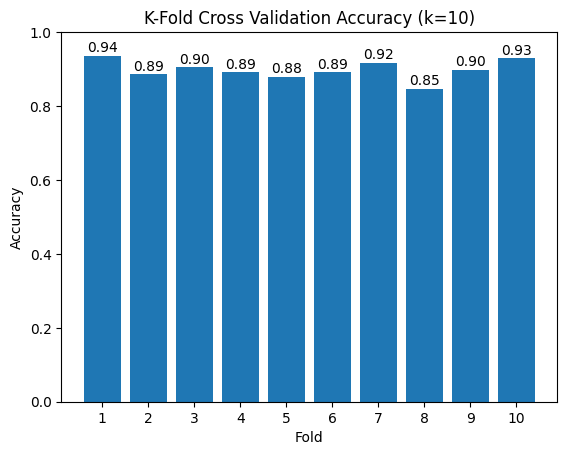

In [14]:
# plot the k-fold cross validation with bar chart
plt.bar(range(1, 11), k_scores_10)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_10[0] + 0.01, f'{k_scores_10[0]:.2f}', ha='center')
plt.text(2, k_scores_10[1] + 0.01, f'{k_scores_10[1]:.2f}', ha='center')
plt.text(3, k_scores_10[2] + 0.01, f'{k_scores_10[2]:.2f}', ha='center')
plt.text(4, k_scores_10[3] + 0.01, f'{k_scores_10[3]:.2f}', ha='center')
plt.text(5, k_scores_10[4] + 0.01, f'{k_scores_10[4]:.2f}', ha='center')
plt.text(6, k_scores_10[5] + 0.01, f'{k_scores_10[5]:.2f}', ha='center')
plt.text(7, k_scores_10[6] + 0.01, f'{k_scores_10[6]:.2f}', ha='center')
plt.text(8, k_scores_10[7] + 0.01, f'{k_scores_10[7]:.2f}', ha='center')
plt.text(9, k_scores_10[8] + 0.01, f'{k_scores_10[8]:.2f}', ha='center')
plt.text(10, k_scores_10[9] + 0.01, f'{k_scores_10[9]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 11))
plt.title('K-Fold Cross Validation Accuracy (k=10)')
plt.show()

In [15]:
score_mean = np.mean(k_scores_10)
score_std = np.std(k_scores_10)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')

Mean Accuracy: 0.8980442593499918
Standard Deviation: 0.024611002310580523
Accuracy: 0.8980442593499918 (+/- 0.024611002310580523)
